In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/nandanp6/cataract-image-dataset/train')

Skipping, found downloaded files in "./cataract-image-dataset" (use force=True to force download)


In [4]:
import os
catract=os.listdir('/content/cataract-image-dataset/processed_images/train/cataract')
normal=os.listdir('/content/cataract-image-dataset/processed_images/train/normal')


In [5]:
# downloading images
catract_images_folder_path='/content/cataract-image-dataset/processed_images/train/cataract'
normal_images_folder_path='/content/cataract-image-dataset/processed_images/train/normal'
import cv2
images=[]
labels=[]
for image in catract:
  img_path= os.path.join(catract_images_folder_path,image)
  img=cv2.imread(img_path)
  img=cv2.resize(img,(75,75))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(img)
  labels.append(1)
for image in normal:
  img_path= os.path.join(normal_images_folder_path,image)
  img=cv2.imread(img_path)
  img=cv2.resize(img,(75,75))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(img)
  labels.append(0)

In [6]:
# downloading images


In [7]:
len(images)

491

In [8]:
len(catract)

245

In [9]:
len(labels)

491

In [10]:
len(images)

491

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
X=np.array(images)
y=np.array(labels)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [13]:
X_train.shape

(392, 75, 75, 3)

In [14]:
X_train=X_train/255.0
X_test=X_test/255.0

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [16]:
model=Sequential()

In [17]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(75,75,3)))

In [18]:
model.add(MaxPooling2D(2,2))

In [19]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))


In [20]:
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(14,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,epochs=20,batch_size=10,validation_data=(X_test,y_test))


Epoch 1/20
40/40 [==============================] - 10s 72ms/step - loss: 0.6964 - accuracy: 0.4898 - val_loss: 0.6907 - val_accuracy: 0.6364
Epoch 2/20
40/40 [==============================] - 1s 22ms/step - loss: 0.6315 - accuracy: 0.6709 - val_loss: 0.5417 - val_accuracy: 0.7374
Epoch 3/20
40/40 [==============================] - 1s 24ms/step - loss: 0.5136 - accuracy: 0.7602 - val_loss: 0.4889 - val_accuracy: 0.7778
Epoch 4/20
40/40 [==============================] - 1s 15ms/step - loss: 0.3860 - accuracy: 0.8469 - val_loss: 0.5066 - val_accuracy: 0.8081
Epoch 5/20
40/40 [==============================] - 1s 14ms/step - loss: 0.3360 - accuracy: 0.8699 - val_loss: 0.4174 - val_accuracy: 0.8687
Epoch 6/20
40/40 [==============================] - 1s 16ms/step - loss: 0.2665 - accuracy: 0.8980 - val_loss: 0.5052 - val_accuracy: 0.8485
Epoch 7/20
40/40 [==============================] - 1s 13ms/step - loss: 0.2710 - accuracy: 0.8827 - val_loss: 0.4878 - val_accuracy: 0.8182
Epoch 8/20
4

In [35]:
img_path='/content/cataract-image-dataset/processed_images/train/cataract/image_1.png'

img=cv2.imread(img_path)
img=cv2.resize(img,(75,75))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
image=np.expand_dims(img,axis=0)
image=image/255.0
pred=model.predict(image)

1/1 [==============================] - 0s 30ms/step


In [36]:
if pred[0][0] >= 0.5:
  print("1 => positive => catract detected")
else:
  print("0 => negative => cractract not detected")

1 => positive => catract detected


In [37]:
pred


array([[0.9974337]], dtype=float32)

In [38]:
image.shape


(1, 75, 75, 3)

In [30]:
import matplotlib.pyplot as plt

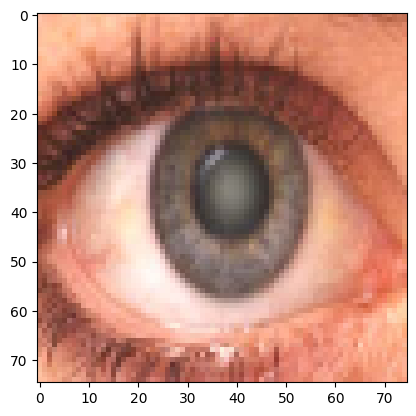

In [40]:
plt.imshow(img)